In [ ]:
## EDA of Coughvid dataset
### check tutorial https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./coughvid_20211012/"

df = pd.read_csv(path+'metadata_compiled.csv', index_col=0)
df.head()

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,48.9,2.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,NaN,NaN,46.0,female,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00098cdb-4da1-4aa7-825a-4f1b9abc214b,2021-01-22T22:08:06.742577+00:00,0.1133,47.4,9.4,66.0,female,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34434 entries, 0 to 34433
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   34434 non-null  object 
 1   datetime               34434 non-null  object 
 2   cough_detected         34434 non-null  float64
 3   latitude               19431 non-null  float64
 4   longitude              19431 non-null  float64
 5   age                    19396 non-null  float64
 6   gender                 20664 non-null  object 
 7   respiratory_condition  20664 non-null  object 
 8   fever_muscle_pain      20664 non-null  object 
 9   status                 20664 non-null  object 
 10  status_SSL             8331 non-null   object 
 11  quality_1              820 non-null    object 
 12  cough_type_1           820 non-null    object 
 13  dyspnea_1              820 non-null    object 
 14  wheezing_1             820 non-null    object 
 15  st

In [4]:
# calculate the percentage of missing values in each column

(df.isnull().sum()/(len(df)))*100

uuid                      0.000000
datetime                  0.000000
cough_detected            0.000000
latitude                 43.570308
longitude                43.570308
age                      43.671952
gender                   39.989545
respiratory_condition    39.989545
fever_muscle_pain        39.989545
status                   39.989545
status_SSL               75.805890
quality_1                97.618633
cough_type_1             97.618633
dyspnea_1                97.618633
wheezing_1               97.618633
stridor_1                97.618633
choking_1                97.618633
congestion_1             97.618633
nothing_1                97.618633
diagnosis_1              97.618633
severity_1               97.618633
quality_2                97.618633
cough_type_2             97.621537
dyspnea_2                97.618633
wheezing_2               97.618633
stridor_2                97.618633
choking_2                97.618633
congestion_2             97.618633
nothing_2           

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cough_detected,34434.0,0.641199,0.383535,0.0,0.20515,0.85045,0.9773,0.9994
latitude,19431.0,33.301750,21.517910,-54.8,33.70000,41.00000,46.3000,65.1000
longitude,19431.0,7.632628,53.968134,-158.1,-3.80000,6.60000,32.5000,175.7000
age,19396.0,36.758749,14.833325,1.0,25.00000,35.00000,46.0000,102.0000


In [6]:
df.columns

Index(['uuid', 'datetime', 'cough_detected', 'latitude', 'longitude', 'age',
       'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'status_SSL', 'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1',
       'stridor_1', 'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1',
       'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2',
       'stridor_2', 'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2',
       'severity_2', 'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3',
       'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3',
       'severity_3', 'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4',
       'stridor_4', 'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4',
       'severity_4'],
      dtype='object')

In [7]:
# Before EDA, lets separate Numerical and categorical variables for easy analysis

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['uuid', 'datetime', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')
Numerical Variables:
['cough_detected', 'latitude', 'longitude', 'age']


cough_detected
Skew : -0.62


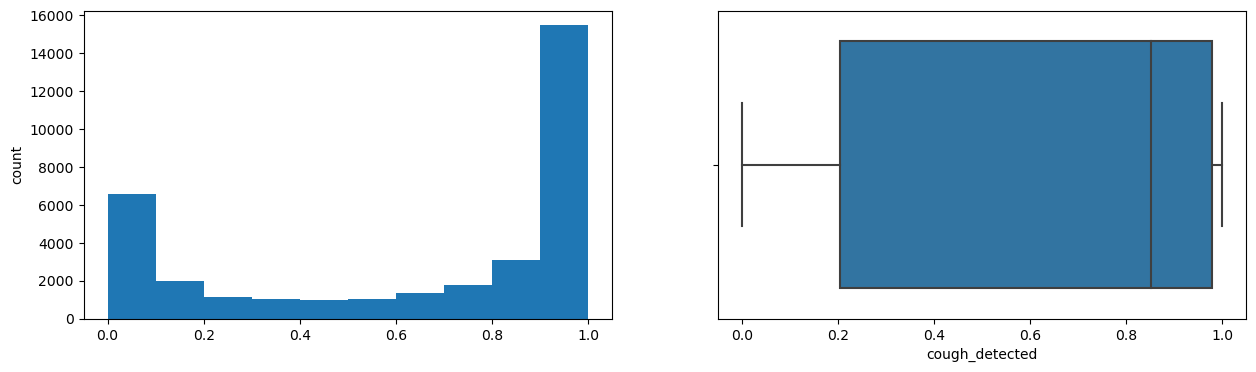

latitude
Skew : -1.93


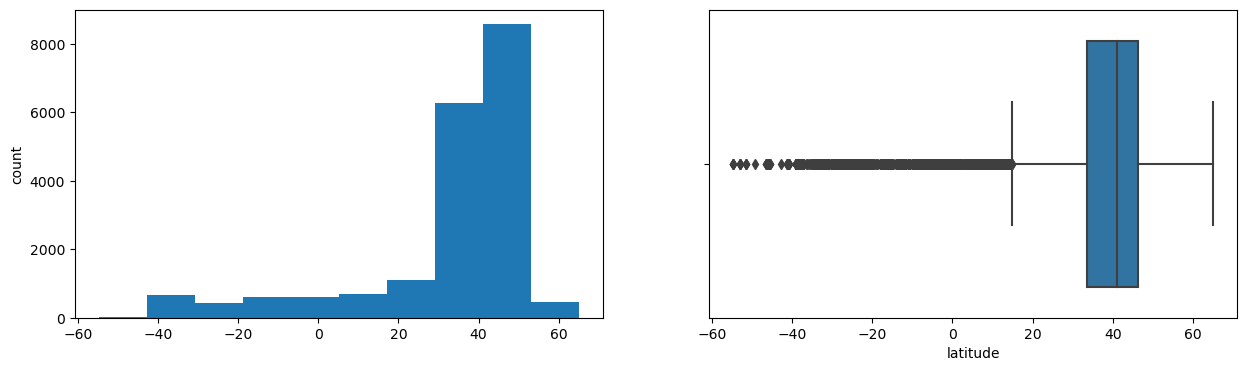

longitude
Skew : 0.02


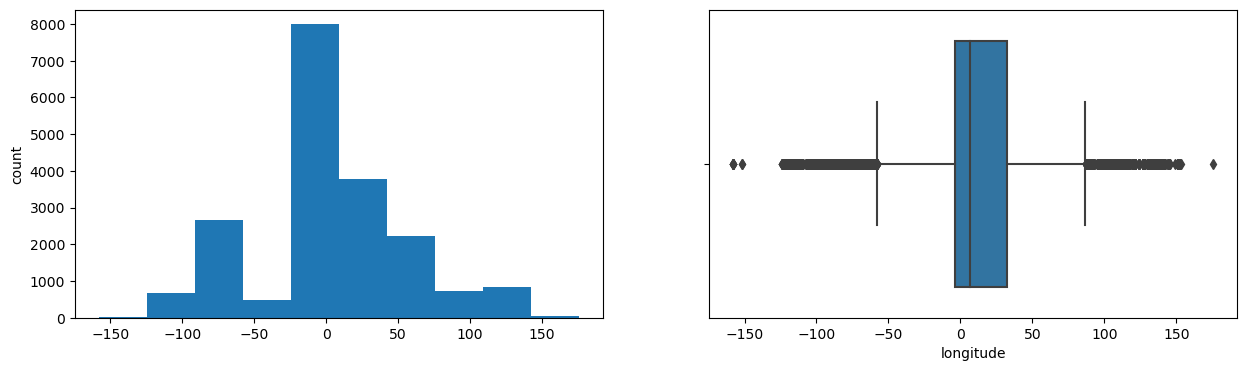

age
Skew : 0.56


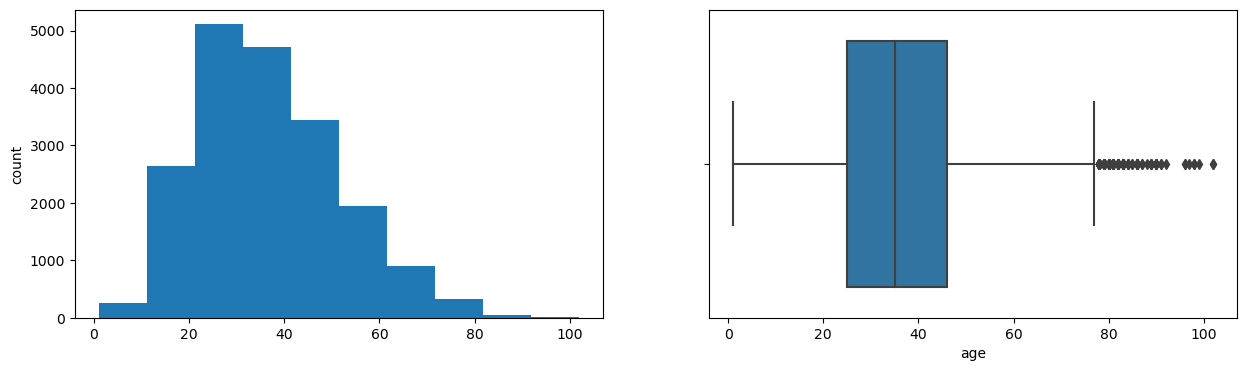

In [8]:
# show the pattern of the variables, as some variables may have skewness and outliers.

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

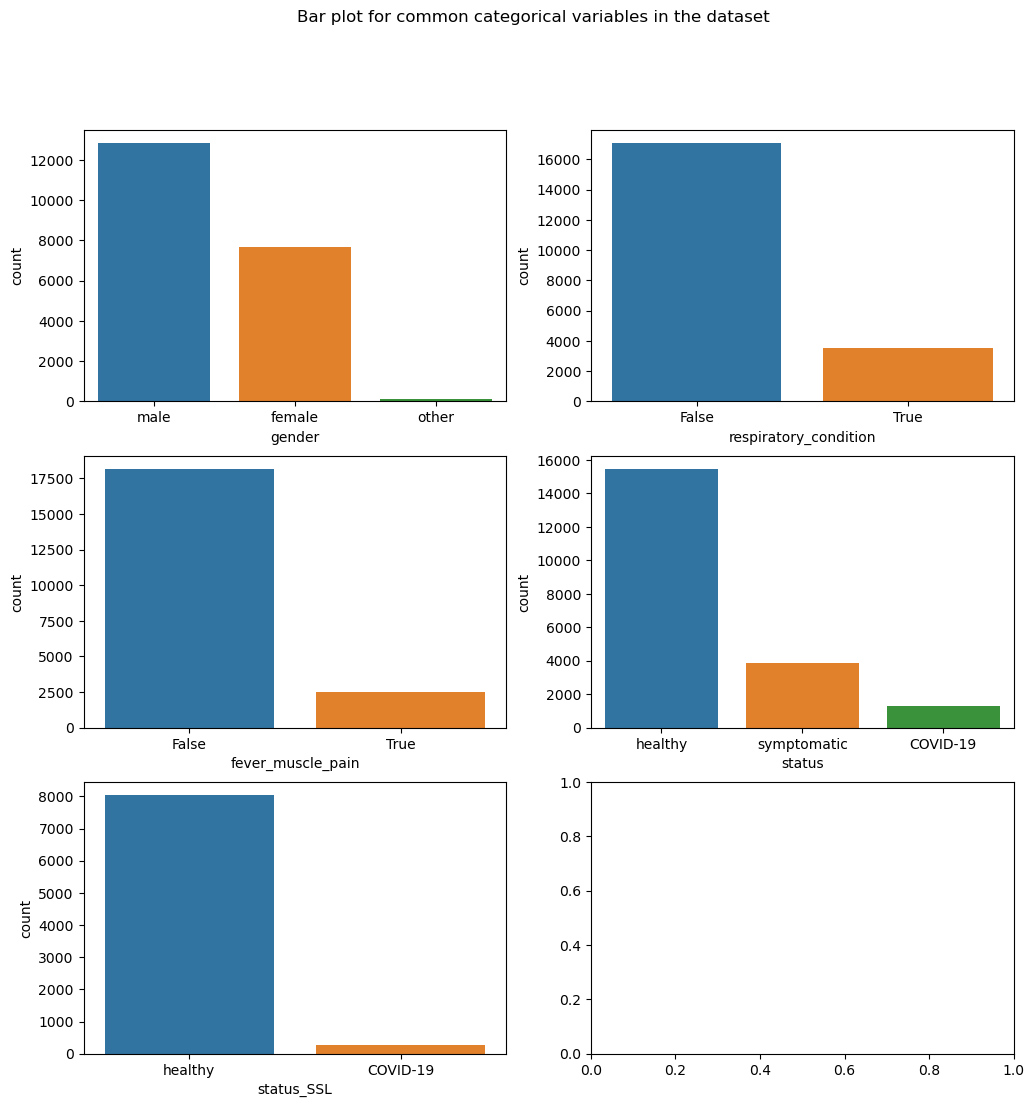

In [19]:
# There are total 47 categorical variables in cat_cols. Let's plot meaningful categorical variables which are common in dataset.

fig, axes = plt.subplots(3, 2, figsize = (12, 12))
fig.suptitle('Bar plot for common categorical variables in the dataset')

sns.countplot(ax = axes[0, 0],x = 'gender', data = df, order = df['gender'].value_counts().index);
sns.countplot(ax = axes[0, 1],x='respiratory_condition',data=df, order=df['respiratory_condition'].value_counts().index);
sns.countplot(ax = axes[1, 0],x = 'fever_muscle_pain', data = df, order = df['fever_muscle_pain'].value_counts().index); 
sns.countplot(ax = axes[1, 1],x = 'status', data = df, order = df['status'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'status_SSL', data = df, order = df['status_SSL'].value_counts().index); 

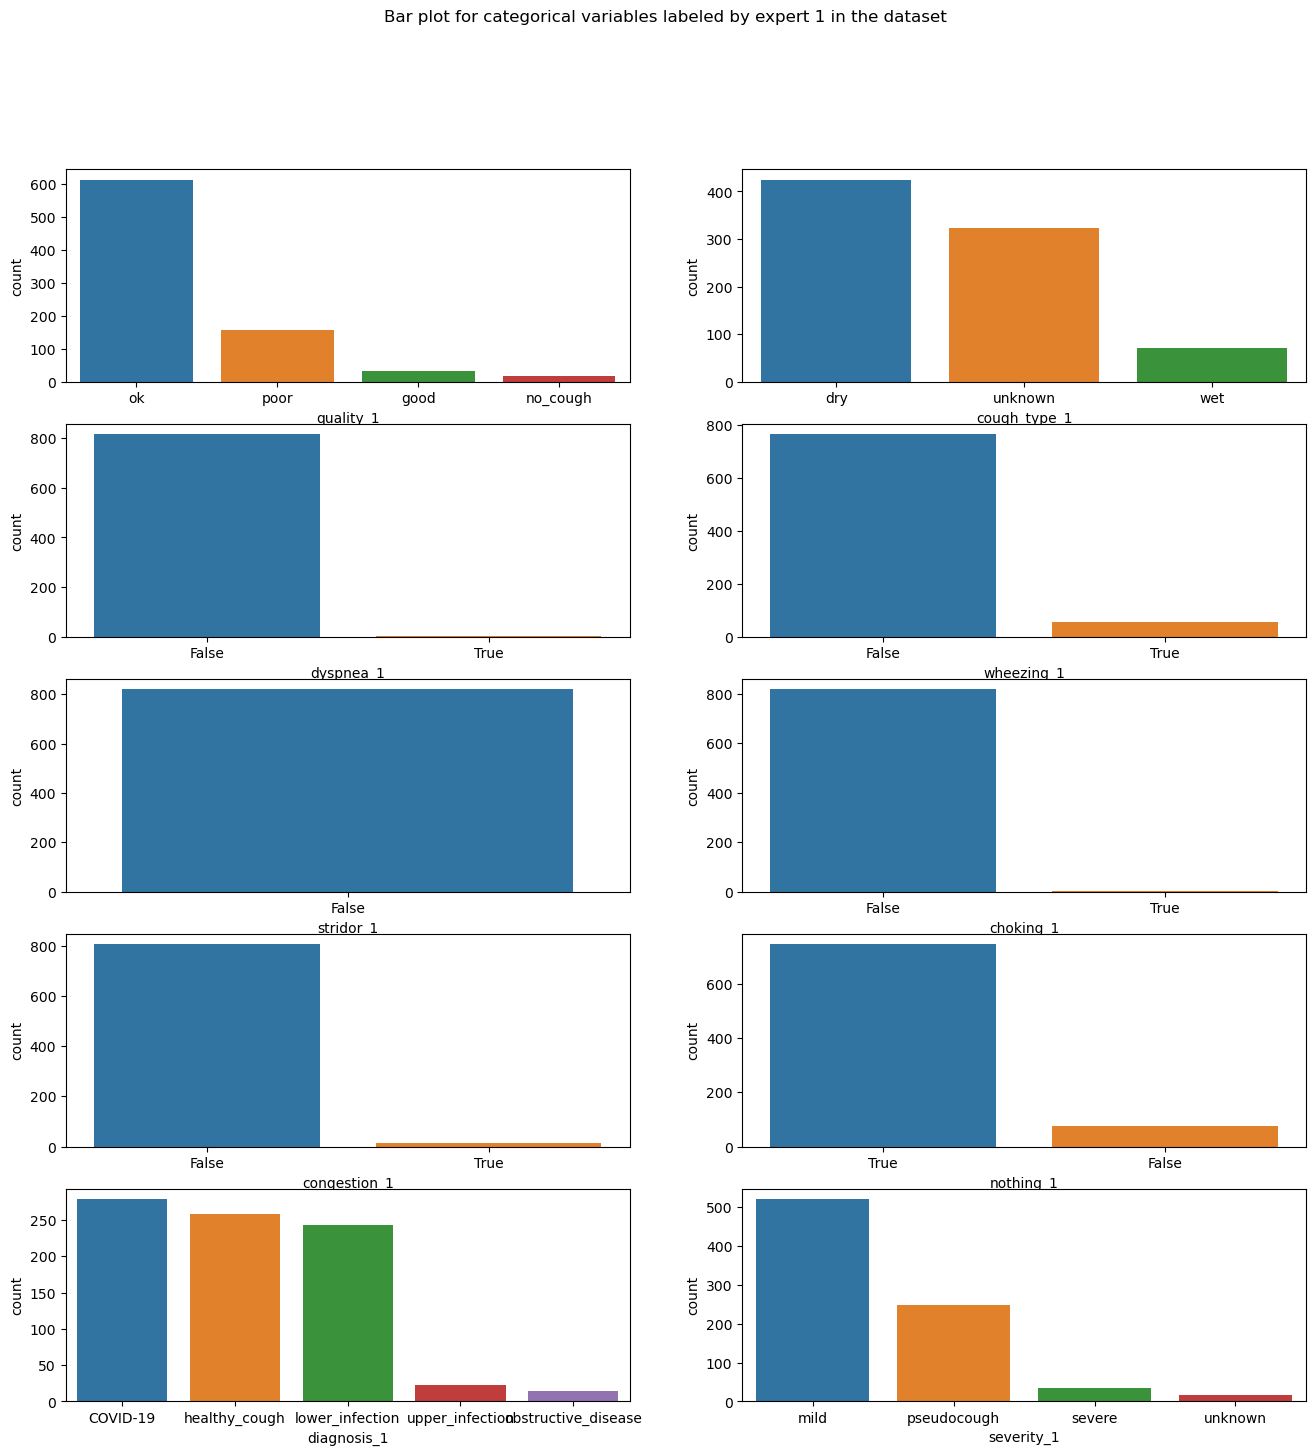

In [17]:
# Let's plot meaningful categorical variables.

fig, axes = plt.subplots(5, 2, figsize = (16, 16))
fig.suptitle('Bar plot for categorical variables labeled by expert 1 in the dataset')
sns.countplot(ax = axes[0, 0], x = 'quality_1', data = df, order = df['quality_1'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'cough_type_1', data = df, order = df['cough_type_1'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'dyspnea_1', data = df, order = df['dyspnea_1'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'wheezing_1', data = df, order = df['wheezing_1'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'stridor_1', data = df, order = df['stridor_1'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'choking_1', data = df, order = df['choking_1'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'congestion_1', data = df, order = df['congestion_1'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'nothing_1', data = df, order = df['nothing_1'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'diagnosis_1', data = df, order = df['diagnosis_1'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'severity_1', data = df, order = df['severity_1'].value_counts().index);

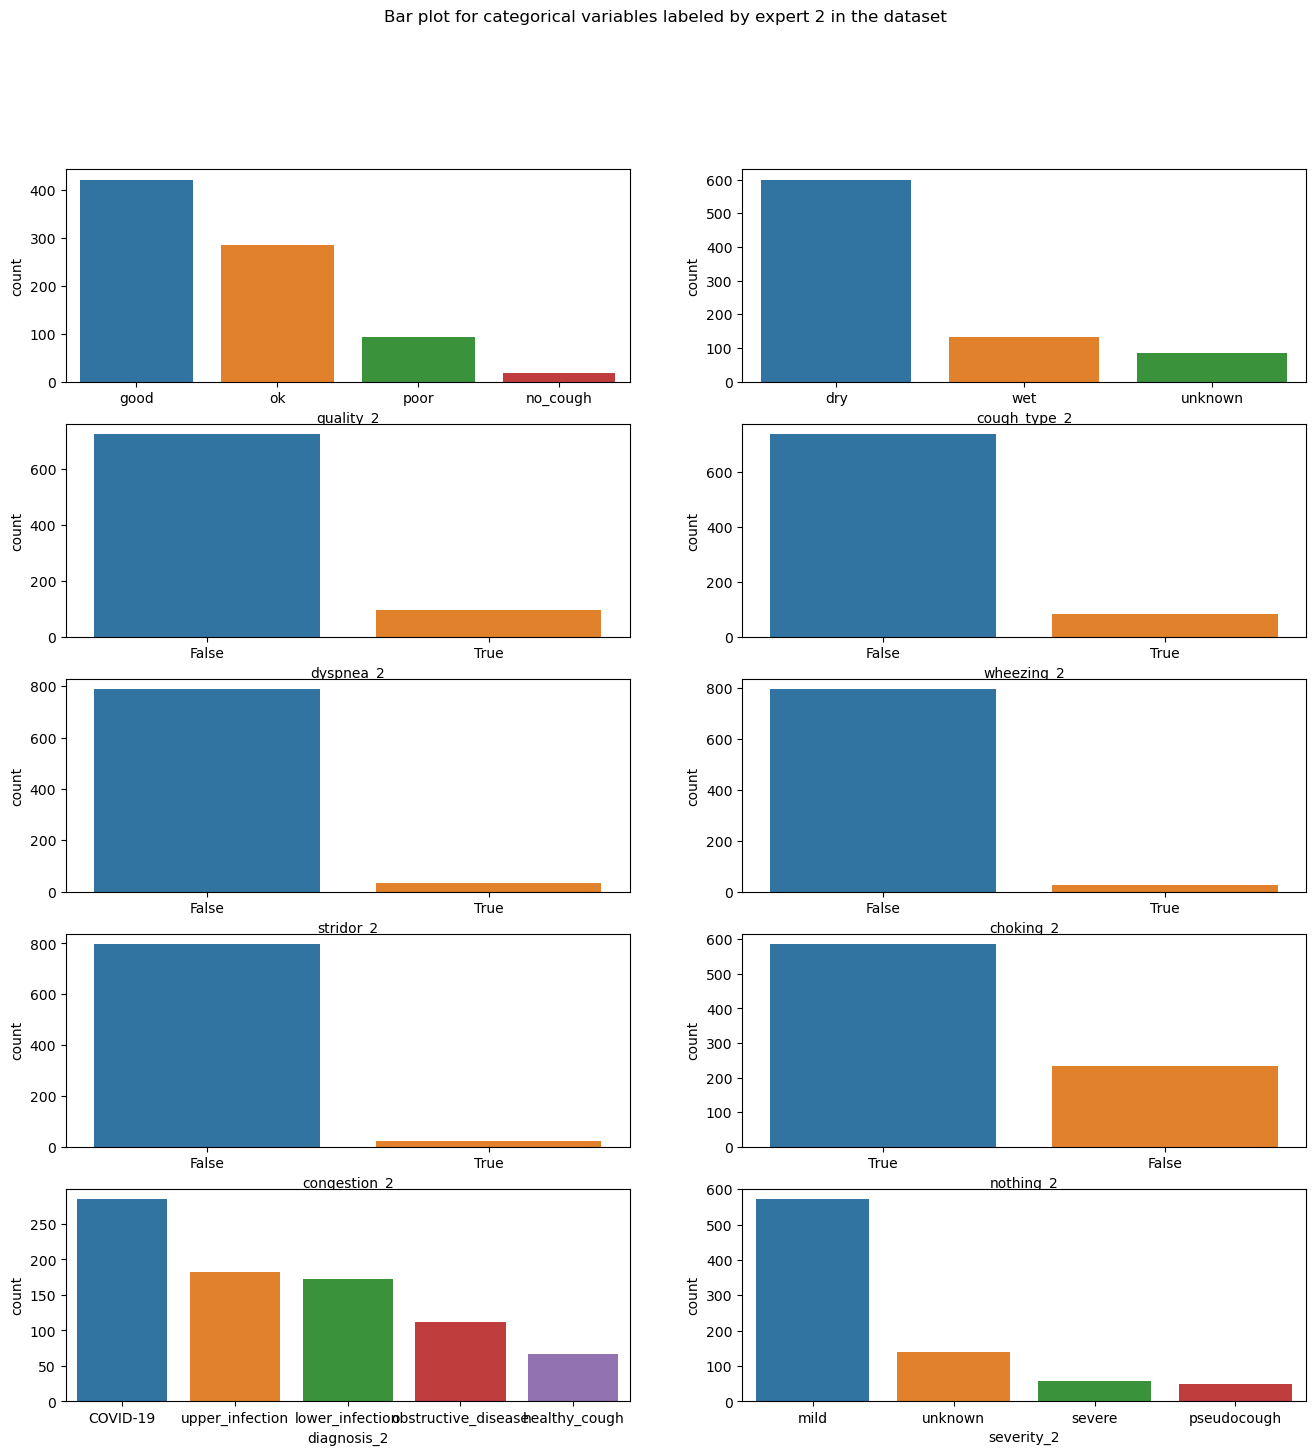

In [14]:
# Let's plot meaningful categorical variables. 

fig, axes = plt.subplots(5, 2, figsize = (16, 16))
fig.suptitle('Bar plot for categorical variables labeled by expert 2 in the dataset')
sns.countplot(ax = axes[0, 0], x = 'quality_2', data = df, order = df['quality_2'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'cough_type_2', data = df, order = df['cough_type_2'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'dyspnea_2', data = df, order = df['dyspnea_2'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'wheezing_2', data = df, order = df['wheezing_2'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'stridor_2', data = df, order = df['stridor_2'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'choking_2', data = df, order = df['choking_2'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'congestion_2', data = df, order = df['congestion_2'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'nothing_2', data = df, order = df['nothing_2'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'diagnosis_2', data = df, order = df['diagnosis_2'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'severity_2', data = df, order = df['severity_2'].value_counts().index);

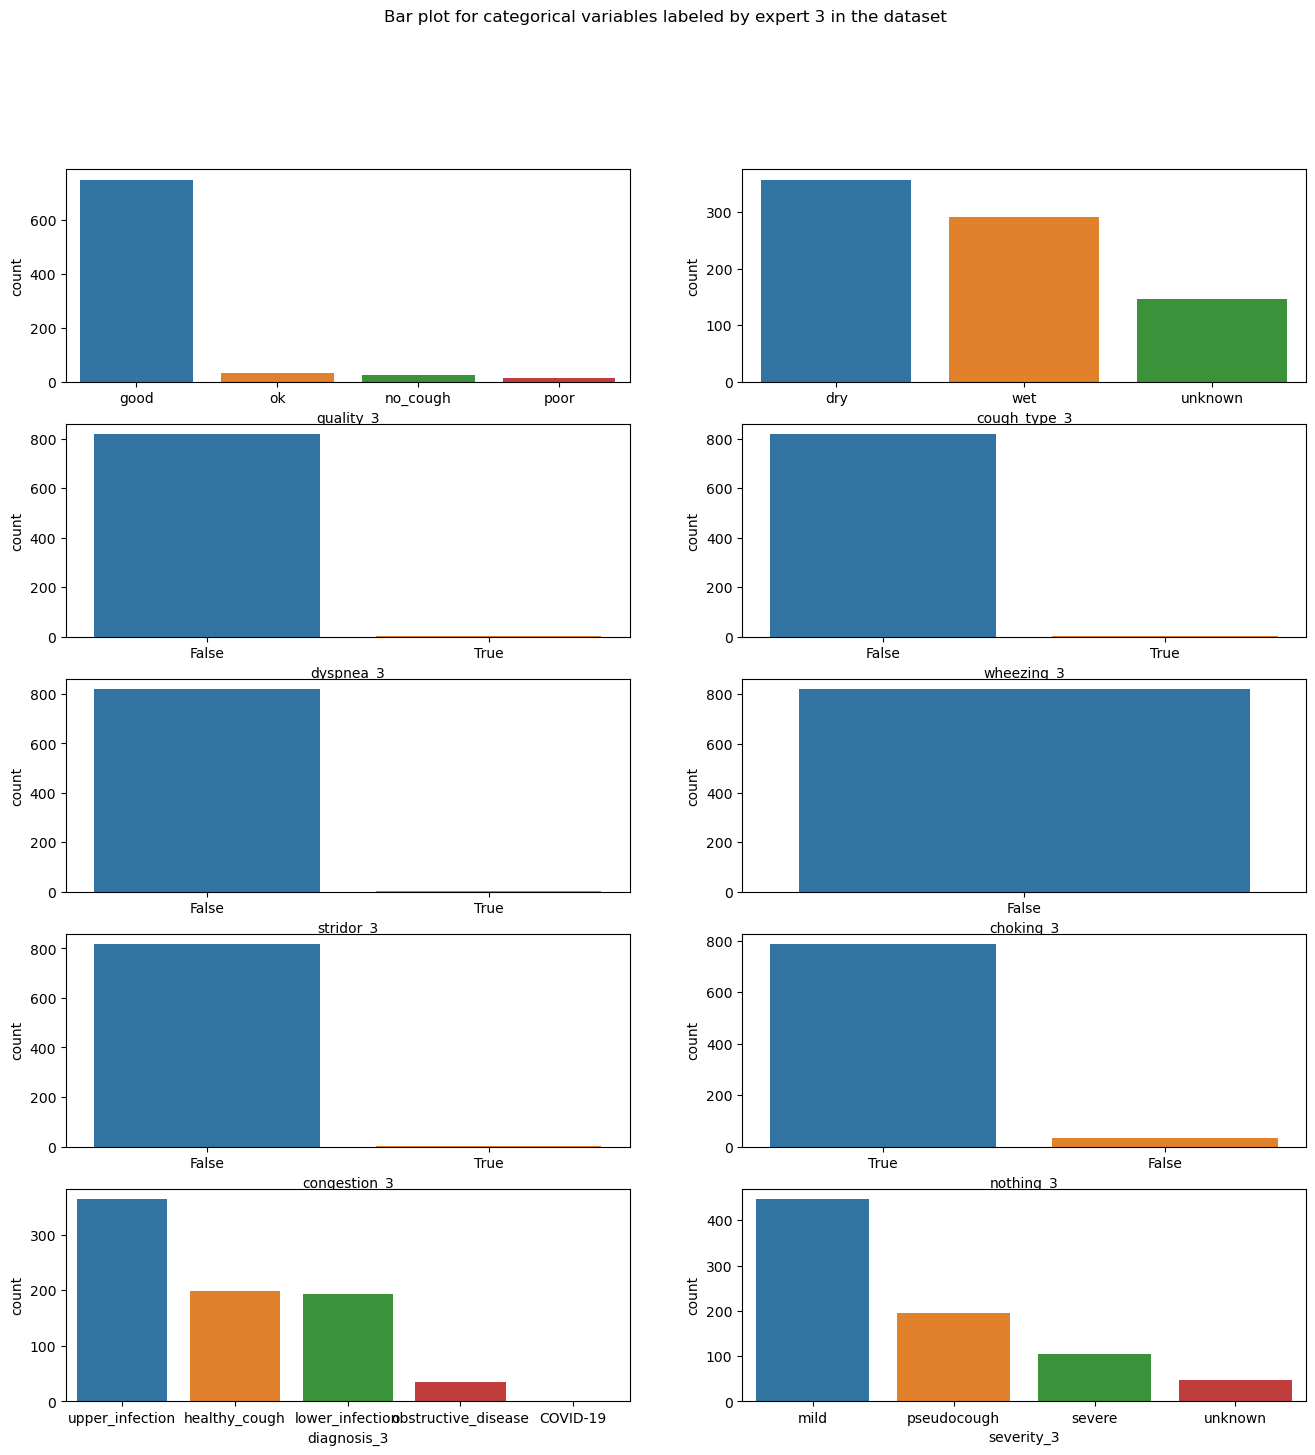

In [15]:
# Let's plot meaningful categorical variables. 

fig, axes = plt.subplots(5, 2, figsize = (16, 16))
fig.suptitle('Bar plot for categorical variables labeled by expert 3 in the dataset')
sns.countplot(ax = axes[0, 0], x = 'quality_3', data = df, order = df['quality_3'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'cough_type_3', data = df, order = df['cough_type_3'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'dyspnea_3', data = df, order = df['dyspnea_3'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'wheezing_3', data = df, order = df['wheezing_3'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'stridor_3', data = df, order = df['stridor_3'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'choking_3', data = df, order = df['choking_3'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'congestion_3', data = df, order = df['congestion_3'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'nothing_3', data = df, order = df['nothing_3'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'diagnosis_3', data = df, order = df['diagnosis_3'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'severity_3', data = df, order = df['severity_3'].value_counts().index);

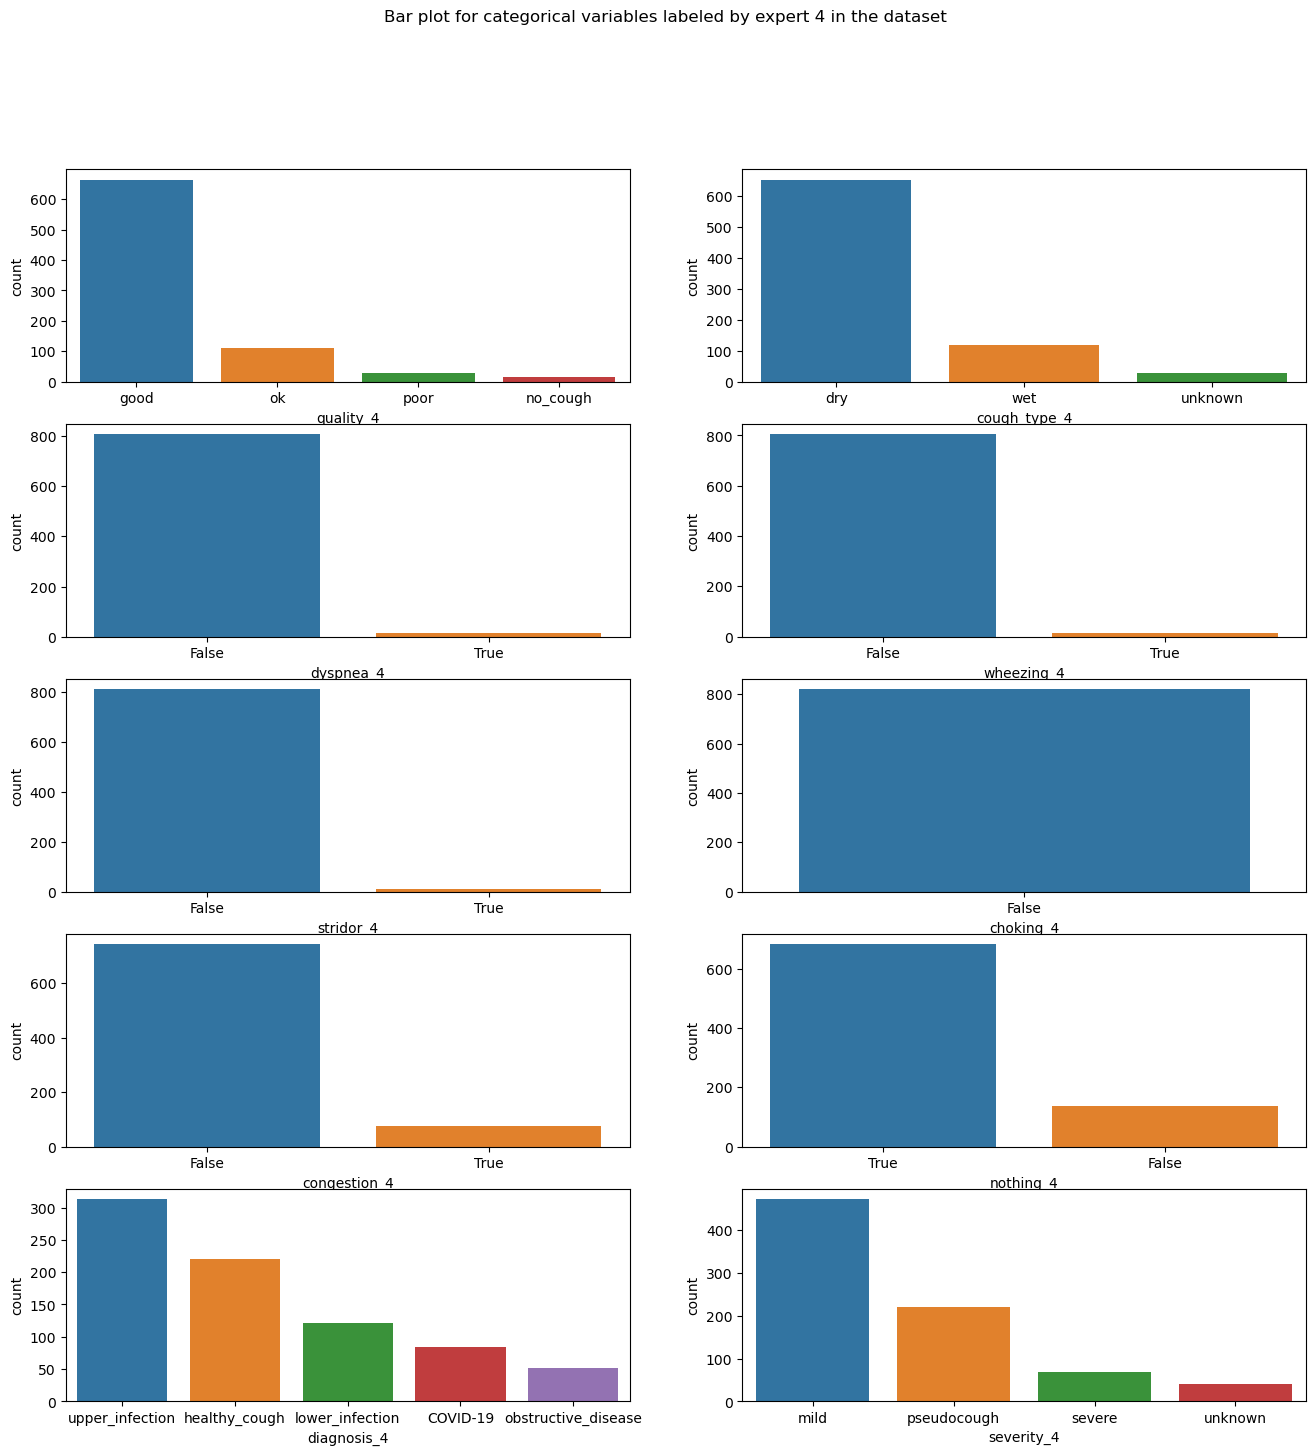

In [16]:
# Let's plot meaningful categorical variables. 

fig, axes = plt.subplots(5, 2, figsize = (16, 16))
fig.suptitle('Bar plot for categorical variables labeled by expert 4 in the dataset')
sns.countplot(ax = axes[0, 0], x = 'quality_4', data = df, order = df['quality_4'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'cough_type_4', data = df, order = df['cough_type_4'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'dyspnea_4', data = df, order = df['dyspnea_4'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'wheezing_4', data = df, order = df['wheezing_4'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'stridor_4', data = df, order = df['stridor_4'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'choking_4', data = df, order = df['choking_4'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'congestion_4', data = df, order = df['congestion_4'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'nothing_4', data = df, order = df['nothing_4'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'diagnosis_4', data = df, order = df['diagnosis_4'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'severity_4', data = df, order = df['severity_4'].value_counts().index);

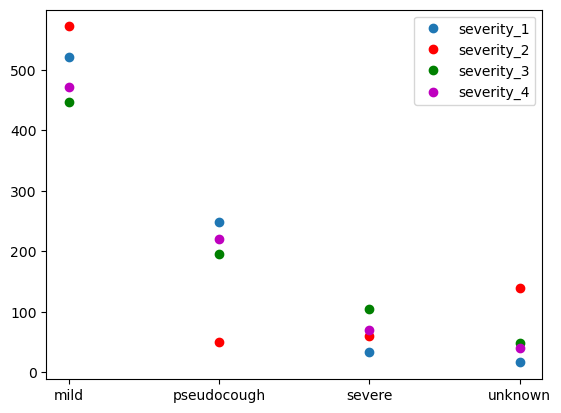

In [20]:
# All four expert classified severity of the coughs and their is discrepancy within their opinions
severity_1_counts = df['severity_1'].value_counts()
severity_2_counts = df['severity_2'].value_counts()
severity_3_counts = df['severity_3'].value_counts()
severity_4_counts = df['severity_4'].value_counts()

plt.plot(severity_1_counts,'o', label='severity_1')
plt.plot(severity_2_counts,'or', label='severity_2')
plt.plot(severity_3_counts,'og', label='severity_3')
plt.plot(severity_4_counts,'om', label='severity_4')
plt.legend(loc='upper right', frameon=True);

In [21]:
# find uuid for which 'severity_1' till 'severity_4' are not null

df1 = df[df[('severity_1')].notnull()]
print(df1.shape)

df2 = df[df[('severity_2')].notnull()]
print(df2.shape)

df3 = df[df[('severity_3')].notnull()]
print(df3.shape)

df4 = df[df[('severity_4')].notnull()]
print(df4.shape)

(820, 51)
(820, 51)
(796, 51)
(802, 51)


In [22]:
# all experts assigned somewhat 127 audios, the records without null.
filtered_df = df[df[['severity_1', 'severity_2', 'severity_3', 'severity_4']].notnull().all(1)]
filtered_df.shape

(127, 51)

## create dataframe by merging df1, df2, df3 and df4 and omitting duplicate records
### use it for preprocessing
